<p style="font-size:300%; text-align:center"> king county housing price modeling</p>
<p style="font-size:150%; text-align:center"> Analysis</p>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import statsmodels.api as sm
from statsmodels.formula.api import ols
plt.style.use('ggplot')

##  Read the Final Model

In [2]:
# load normalized data from the final model
kc_final = pd.read_csv('data/kc_house_final_model.csv')
# read back real price values from cleaned data
kc_clean = pd.read_csv('data/kc_house_selected.csv')

## comparison of real and predicted 

In [3]:

kc_real = kc_clean[['price']]
y_real_log = np.log(kc_real.iloc[:,0].values)

# read X to creat Y_predicted from X
kc_predict = kc_final
X_train = kc_predict.drop(['price'], axis =1 )

# Create OLS model and summary and constants 
ols_model = sm.OLS(y_real_log, sm.add_constant(X_train), hasconst= True)
model = ols_model.fit()
#train_results = model.summary()

y_pred = model.predict(sm.add_constant(X_train))


C:\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


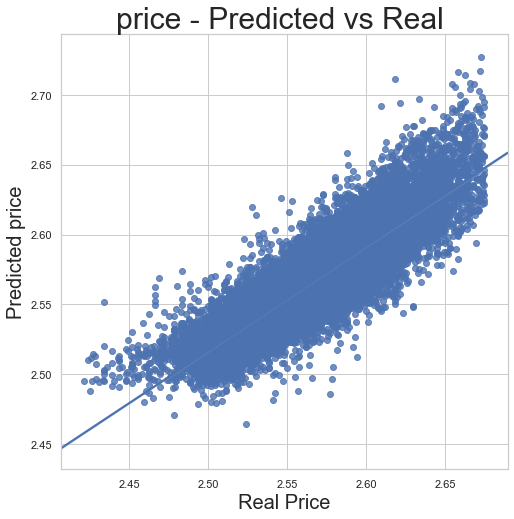

In [4]:
# Plot predicted values
sns.set(style="whitegrid")   
#fig, ax = plt.subplots(figsize=(8, 8))

plt.figure(figsize=(8,8))
plt.title('price - Predicted vs Real ',fontsize=30)
ax = sns.regplot(x=y_real_log, y=y_pred);
ax.set_xlabel('Real Price', fontsize=20)
ax.set_ylabel("Predicted price", fontsize=20)

plt.savefig('img/Pred_vs_real.png') # Save that figure
plt.show()

##  Read the clean KC housing data for analysis

In [5]:
kc = pd.read_csv('data/kc_house_data_clean.csv')
#kc.info()

In [6]:
'''
The feature 'date' is the date the souse sold in king county. A date data type will not be included 
in the regression. Thus, it may be better to categorize the date into season.
'''
kc['date']= pd.to_datetime(kc['date'])
kc['month'] = kc['date'].dt.month # add a month column to the dataframe
#kc.month.unique()
kc.month = kc.month.replace(12, 0) # change 12 to 0 so that 0-2 represent winter
#creating bins for the season
bins = [0, 3, 6, 9, 11]
kc['season'] = pd.cut(kc['month'], bins, include_lowest = True, labels = ["winter", "spring", "summer", "fall"])
kc['season'] = kc['season'].cat.as_unordered()
#kc['season'].value_counts().plot(kind='bar')
#kc.season

In [7]:
kc = kc.drop(['id', 'date'], axis = 1)
kc.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month', 'season'],
      dtype='object')

## Closer look at each feature especially categorical ones 

By feature elimination the best features are 
'sqft_living', 'grade', 'yr_built', 'lat', 'view', 'bathrooms', 'sqft_living15', 'condition', 'floors', 'waterfront_1', 'zipcode', 'long', 'sqft_lot', 'season_spring', 'bedrooms', 'sqft_basement'

### bar charts with mean price

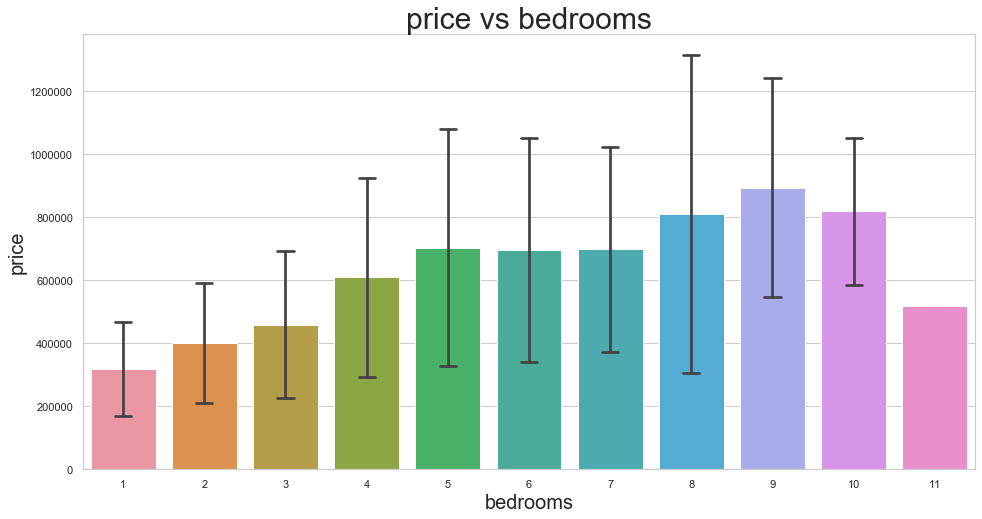

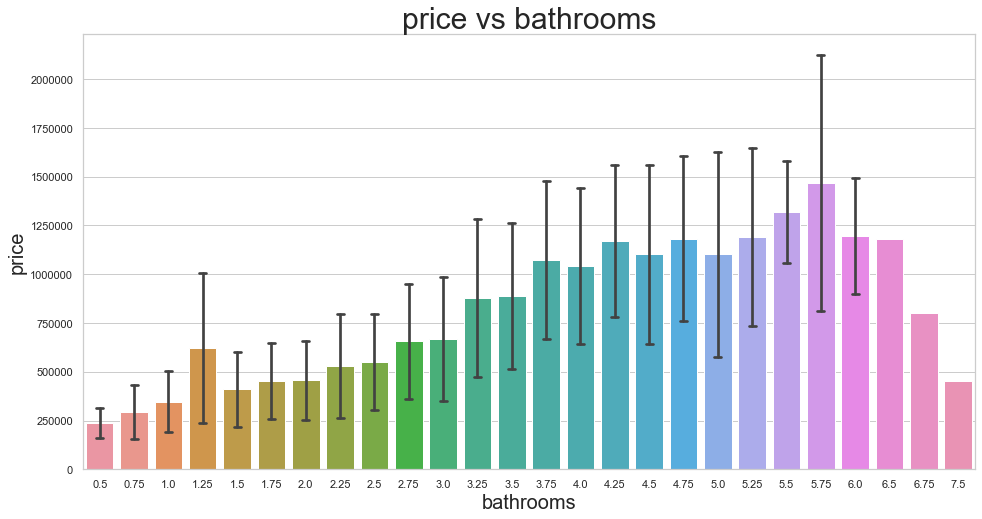

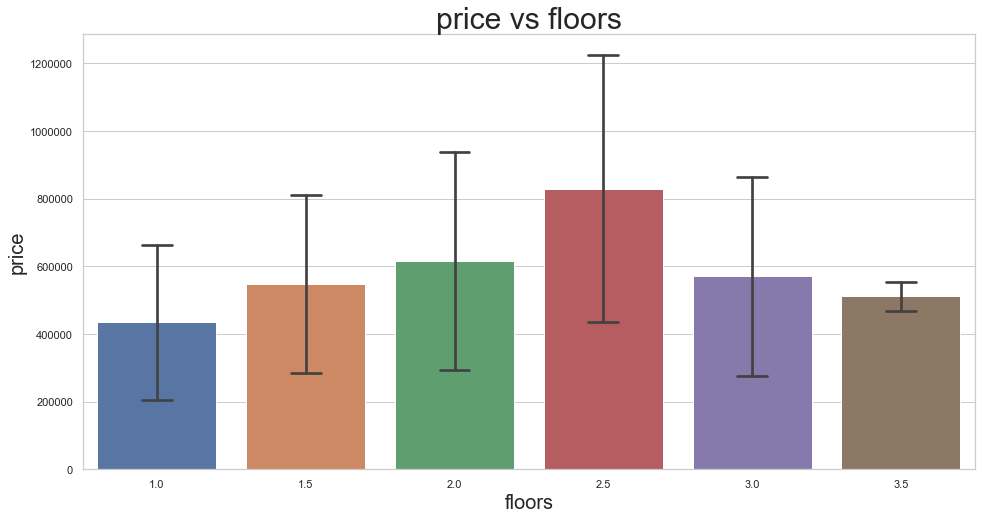

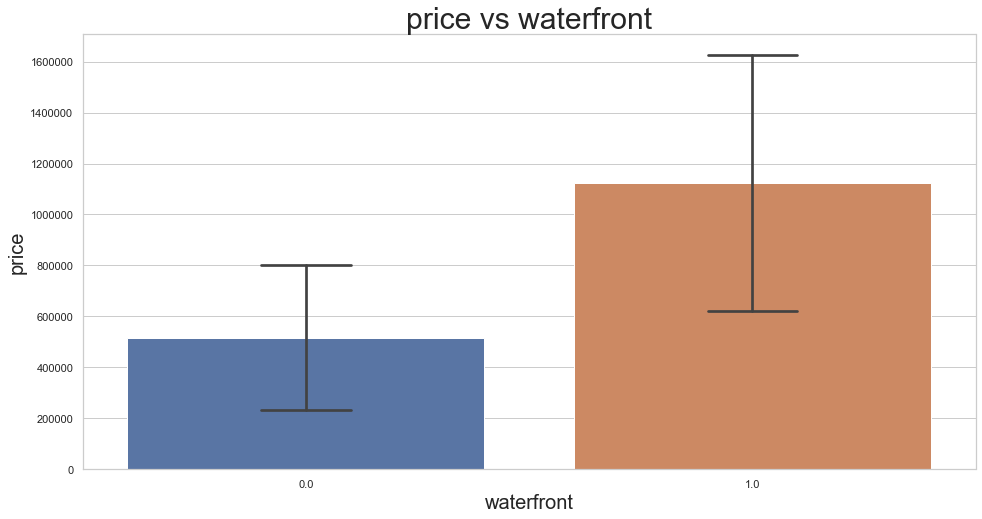

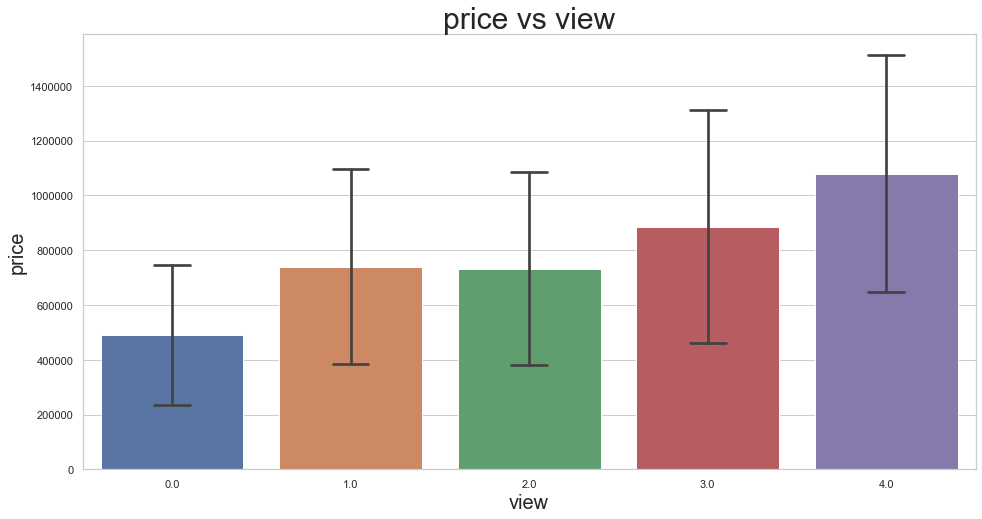

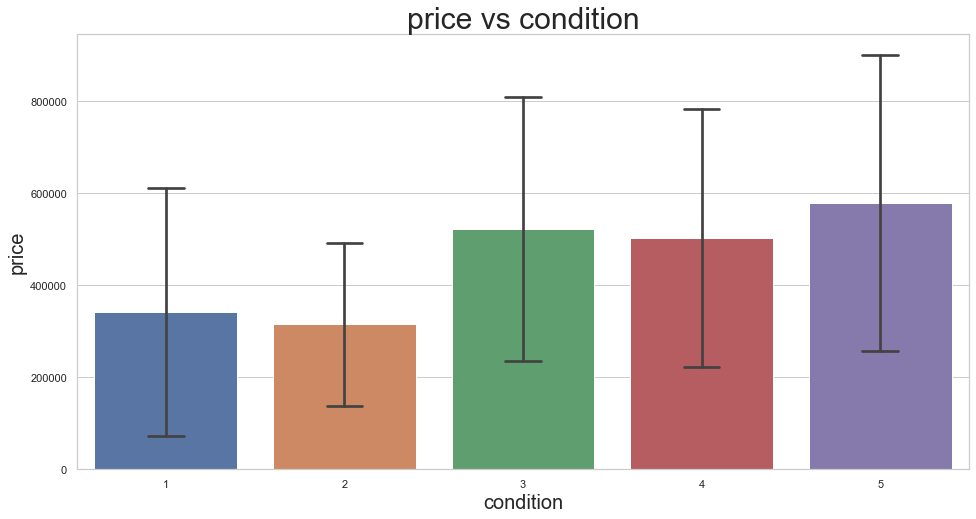

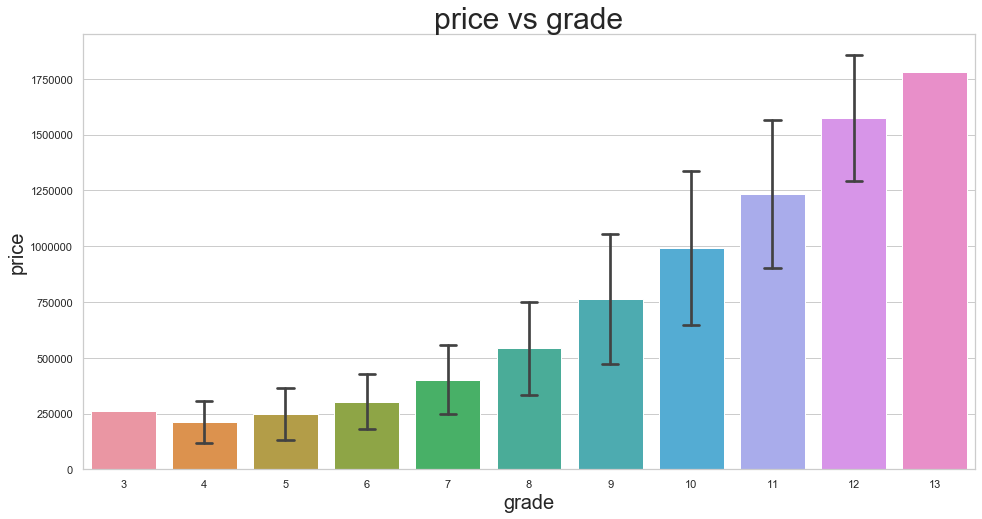

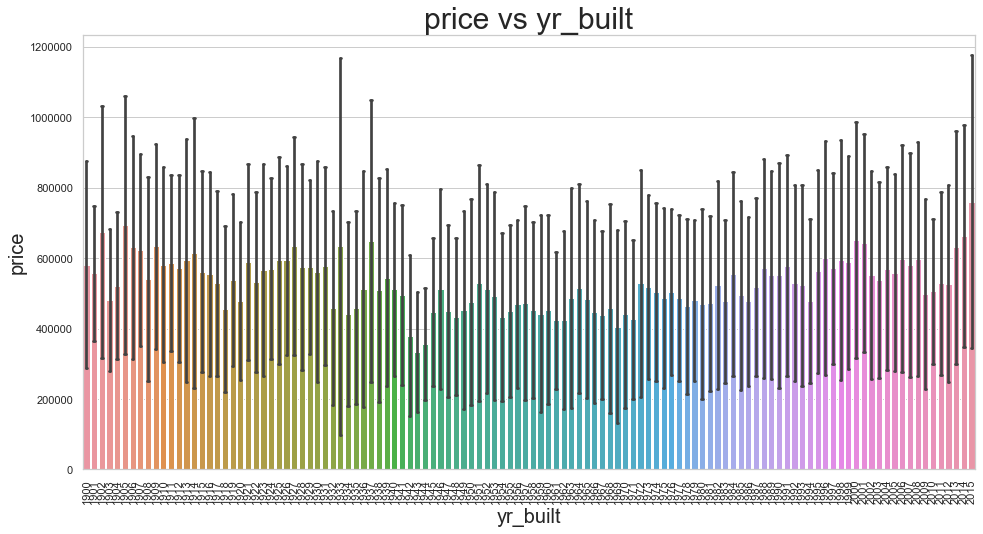

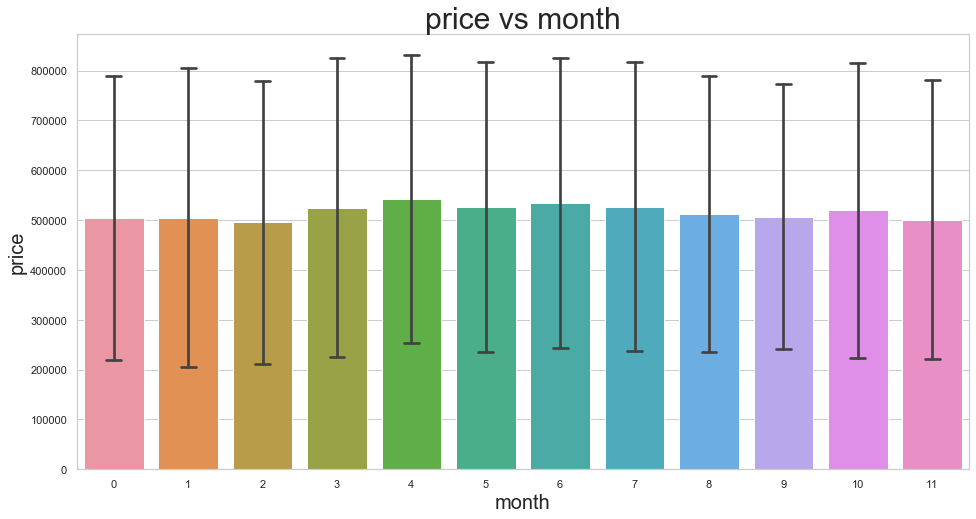

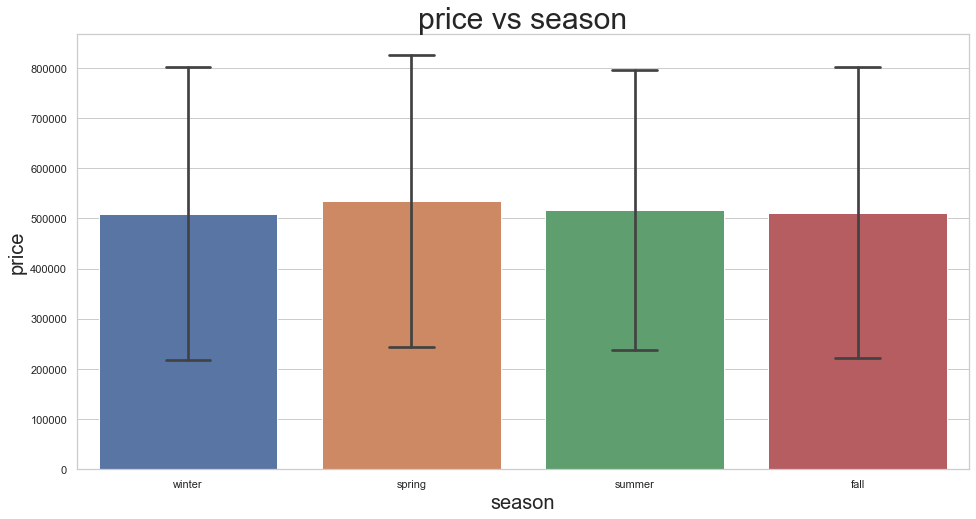

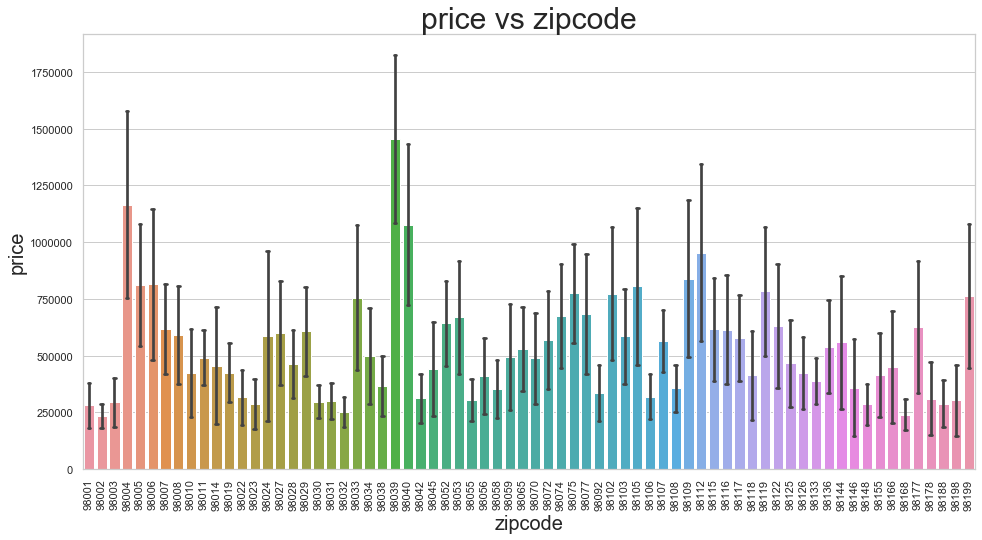

In [8]:
sns.set(style="whitegrid")
#housing = sns.load_dataset("tips")
bar_list=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'month','season', 'zipcode']

for col in bar_list:
    plt.figure(figsize=(16,8))
    plt.title('price vs '+col,fontsize=30)
    ax = sns.barplot(x=col, y="price", data=kc, ci="sd", capsize=0.2)
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("price", fontsize=20)
    if col == 'zipcode' or col == 'yr_built':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.savefig('img/'+col+'.png') # Save that figure
    plt.show()
    

### closer look at 'grade'
The grade of a house seem to be a well constructed metric for housing price. According to [info.kingcounty.gov](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g) the grade of a house is defined as follows


Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

<b>1-3 --Falls short of minimum building standards. Normally cabin or inferior structure. </b> <br>
<b>4   --Generally older, low quality construction. Does not meet code.</b> <br>
<b>5   --Low construction costs and workmanship. Small, simple design.</b> <br>
<b>6   --Lowest grade currently meeting building code. Low quality materials and simple designs.</b> <br>
<b>7   --Average grade of construction and design. Commonly seen in plats and older sub-divisions.</b> <br>
<b>8   --Just above average in construction and design. Usually better materials in both the exterior and interior finish work.</b> <br>
<b>9   --Better architectural design with extra interior and exterior design and quality.</b> <br>
<b>10  --Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.</b> <br>
<b>11  --Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.</b> <br>
<b>12  --Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.</b> <br>
<b>13  --Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. </b> <br>

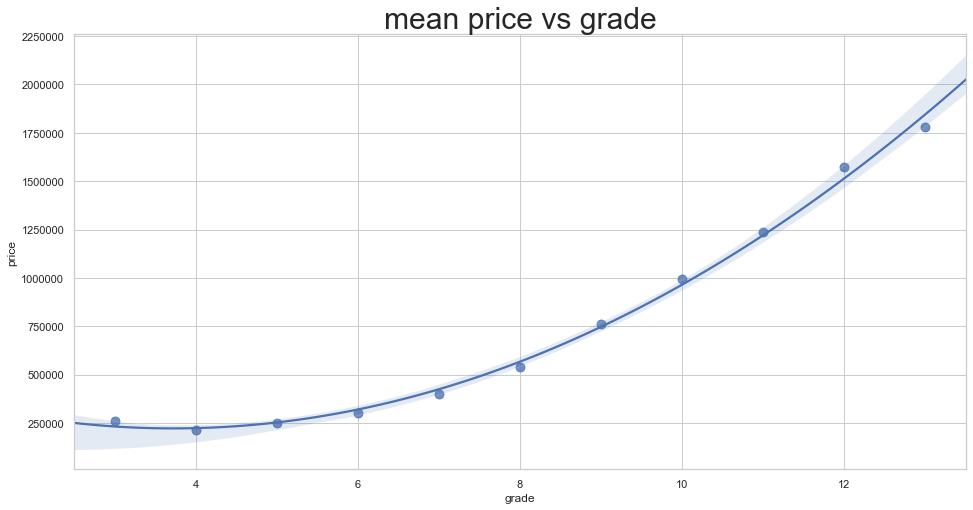

In [9]:
grade = kc[['price', 'grade']]
grade = grade.groupby('grade').aggregate(np.mean)
grade.reset_index(inplace = True)

sns.set(style="whitegrid")
plt.figure(figsize=(16,8))
plt.title('mean price vs grade',fontsize=30)
ax = sns.regplot(x='grade', y="price", data=grade, fit_reg=True, 
                 scatter_kws={"s": 80, "label":'fit'}, 
                 order=2, x_ci=95)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
#ax.legend()
plt.savefig('img/grade_fit.png') # Save figure ./img
plt.show() 

### closer look at 'condition'
Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. 

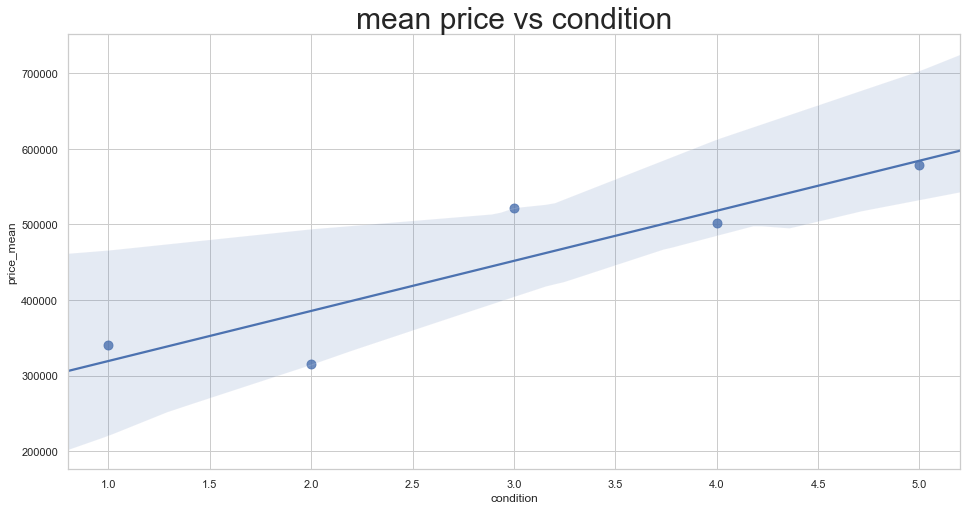

In [21]:
condition = kc[['price', 'condition']]
condition = condition.groupby(['condition'], as_index=False).aggregate({'price': ['mean', 'std']})
#grade.reset_index(inplace = True)
#display(bedrooms.price['std'].head())
condition = pd.concat([condition.condition, condition.price['mean'], condition.price['std']], axis=1)
condition.rename(columns={'mean':'price_mean', 'std':'price_std'}, inplace=True)
#display(bedrooms.head())

#bedrooms = bedrooms[bedrooms.bedrooms < 6]

sns.set(style="whitegrid")
plt.figure(figsize=(16,8))
plt.title('mean price vs condition',fontsize=30)
ax = sns.regplot(x='condition', y="price_mean", data=condition, fit_reg=True, 
                 scatter_kws={"s": 80, "label":'fit'}, 
                 order=1, ci=95)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
#ax.legend()
plt.savefig('img/condition_fit.png') # Save that figure
plt.show() 

### closer look at 'bedrooms'

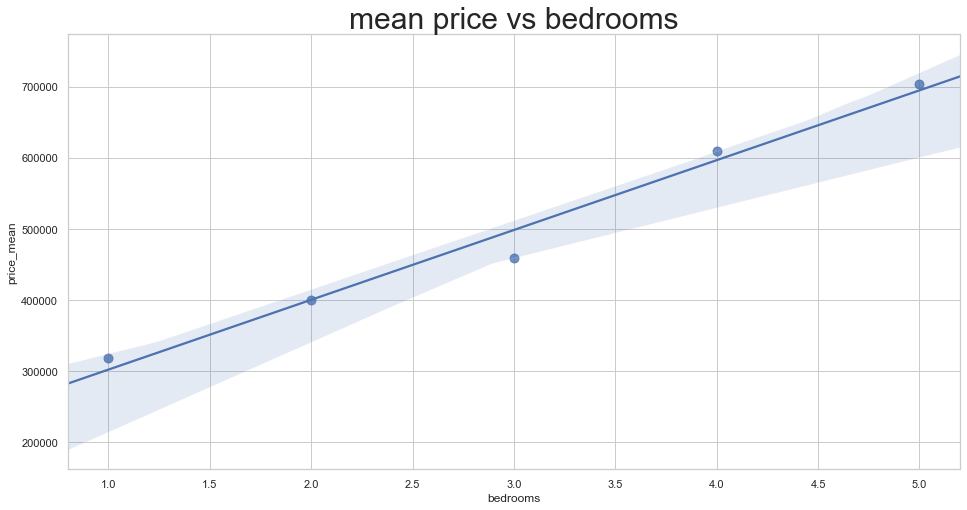

In [10]:
bedrooms = kc[['price', 'bedrooms']]
bedrooms = bedrooms.groupby(['bedrooms'], as_index=False).aggregate({'price': ['mean', 'std']})
#grade.reset_index(inplace = True)
#display(bedrooms.price['std'].head())
bedrooms = pd.concat([bedrooms.bedrooms, bedrooms.price['mean'], bedrooms.price['std']], axis=1)
bedrooms.rename(columns={'mean':'price_mean', 'std':'price_std'}, inplace=True)
#display(bedrooms.head())

bedrooms = bedrooms[bedrooms.bedrooms < 6]

sns.set(style="whitegrid")
plt.figure(figsize=(16,8))
plt.title('mean price vs bedrooms',fontsize=30)
ax = sns.regplot(x='bedrooms', y="price_mean", data=bedrooms, fit_reg=True, 
                 scatter_kws={"s": 80, "label":'fit'}, 
                 order=1, ci=95)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
#ax.legend()
plt.savefig('img/bedrooms_fit.png') # Save that figure
plt.show() 

### closer look at season
The average price of a home doesn't change by month or season. But what about the time when most houses were soled? This could be valuable information to both sellers and buyers. 



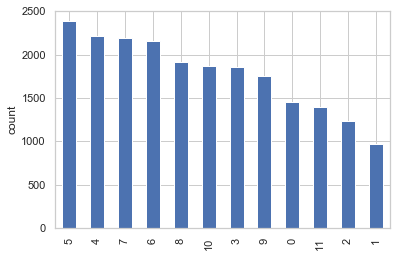

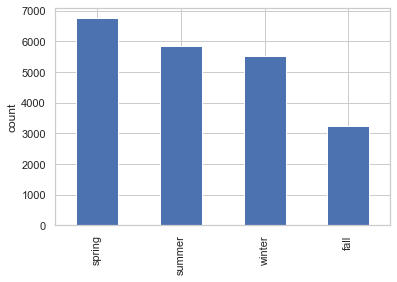

In [19]:
kc['month'].sort_values().value_counts().plot(kind='bar')
plt.ylabel('count')
plt.savefig('img/month_histogram.png') # Save that figure
plt.show()
kc['season'].value_counts().plot(kind='bar')
plt.ylabel('count')
plt.show()

### closer look at 'floors'

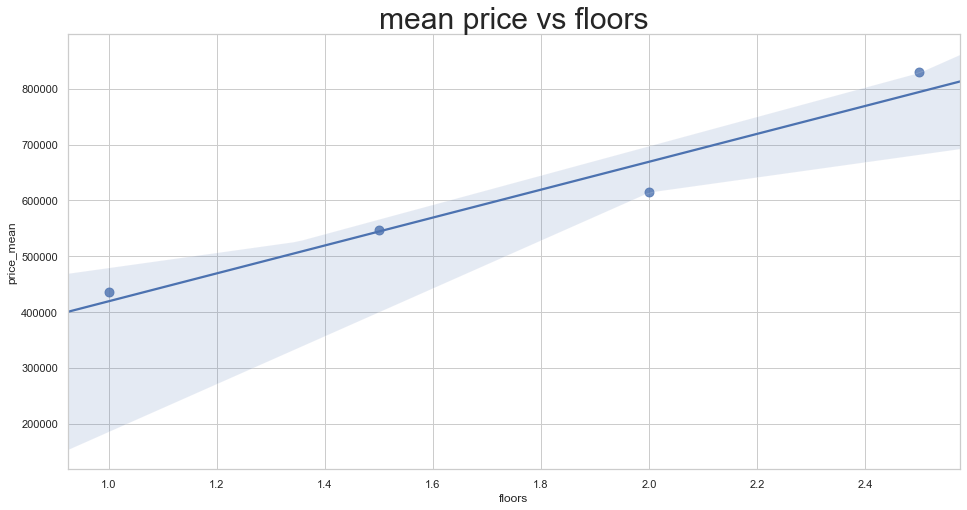

In [11]:
floors = kc[['price', 'floors']]
floors = floors.groupby(['floors'], as_index=False).aggregate({'price': ['mean', 'std']})
#grade.reset_index(inplace = True)
#display(floors.price['std'].head())
floors = pd.concat([floors.floors, floors.price['mean'], floors.price['std']], axis=1)
floors.rename(columns={'mean':'price_mean', 'std':'price_std'}, inplace=True)
#display(floors.head())

floors = floors[floors.floors < 3]

sns.set(style="whitegrid")
plt.figure(figsize=(16,8))
plt.title('mean price vs floors',fontsize=30)
ax = sns.regplot(x='floors', y="price_mean", data=floors, fit_reg=True, 
                 scatter_kws={"s": 80, "label":'fit'}, 
                 order=1, ci=95)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
#ax.legend()
plt.savefig('img/floors_fit.png') # Save that figure
plt.show() 

## Conclusion

<b>Project recommendations to Realtor King LLC:</b>
Realtor King LLC desires to have a data driven pricing model for King county Washington. A dataset of housing prices with 19 features are provided (kc_housing_data.csv) of houses sold between 2014 - 2015. They would like to know specific pertaining to housing prices targeted for both home buyers and seller. <br> <br>

<b>What factors affects the value of a house ? </b> <br>
From the model it shows <b>lattitude, waterfront, bathrooms and grade</b> has the highest slope and contribute to the goodness of fit score. Thus these features must be closely evaluated by both sellers and buyers. Grade has a 2nd order correlation with mean price

<b>What are the features sellers sould be concerned ? </b> <br>
Grade is an imporatant factor for sellers. The 'grade' score defined by the King county was provided above. For example a grade = 10 house the quality is generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage. 

in general better architectural design with unique interior and exterior will be best to increase the house price. 

spring and summer are the most number of housses are sold. Since the supply is low on fall and winter it maybe possible for sellers to increase the price.<br>

<b>What are the features buyers sould be concerned ? </b> <br>
Buyers should closely look at the zipcode where the housing prices are within their budget. Fall and winter there maybe too few posting to choose from so the spring and summer maybe the best time to look for houses. It's clear from the data that in general further you go from downtown lesser you have to pay for a house. 

<b>What is the dependance of zipcode and season ? </b> <br>
The 3 most expensive zipcodes are 98039, 98040 and 98004 respectively.




## Acknoledgement

I would like to thank our instructor Amber for her exceptional teaching and guidance, and Dara for her encouragement. I would like to convay my special thanks to my good friend Prof. Pasan Edirisinghe for his many hourse of explainations of statistics and probability. 